<h1> IQ01 TP2 </h1>

<h2> Exercice 1 : Les bases </h2>

1/ Dans le système binaire classique, on représente l'information avec des 0 et des 1 (base 2) appelés bits. La taille dépend du nombre de bits. On peut représenter $2^n$ valeurs avec $n$ bits.

L'inversion bit à bit (NOT) va inverser tous les bits d'un nombre : les 0 deviennent des 1, et les 1 deviennent des 0. 

Le AND bit à bit prend deux nombres en opérandes et donne un nombre comme résultat. Sur ces deux nombres, il va prendre les bits qui sont à la même place et va effectuer dessus une opération qui donnera le bit du résultat. Il en est de même pour le OR et le XOR. On peut se référer à la table ci-dessous :

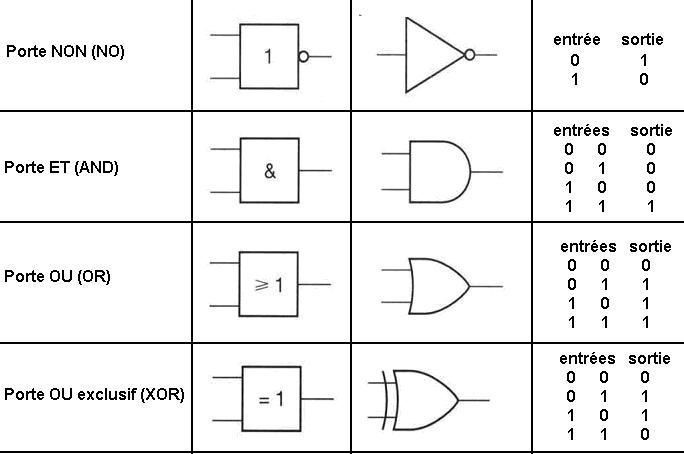

2/ Un qubit possède 2 états de base |0> $ = \begin{pmatrix} 1 \\ 0 \end{pmatrix} $ et |1> $ =  \begin{pmatrix} 0 \\ 1 \end{pmatrix} $. Contrairement à un bit classique, le qubit se compose d'une superposition (quantique linéaire) de ces deux états de base. Il s'écrit $|\psi>=\alpha|0>+\beta|1>$ avec $\alpha$ et $\beta$ complexes vérifiant $|\alpha|^2+|\beta|^2=1$. 

Une mesure correspond à l'« observation » du qubit, ce qui ramène l’état quantique à l’un des deux états classiques. Nous obtenons le résultat 0 avec la probabilité $|α|^2$ et le résultat 1 avec la probabilité $|β|^2$.



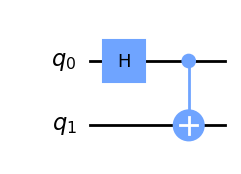

In [37]:
import numpy as np
from qiskit import *
#Création d’un circuit quantique instance de QuantumCircuit
circ = QuantumCircuit(2)
#Ajouter une porte H pour l’entrée (qubit) 0 => superposition
circ.h(0)
# Ajouter l’opération CNOT avec 0 comme qubit de control et le qubit 1 comme cible
# => état de Bell
circ.cx(0, 1)
circ.draw('mpl')

<h2> Exercice 2 : Les portes </h2>

<h3>Opération Hadamard</h3>

La porte Hadamard permet de préparer un qubit dans un état superposé.

$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$

On a, par exemple, $H\begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \frac{1}{\sqrt2}  \begin{pmatrix} \alpha+\beta \\ \alpha-\beta \end{pmatrix}$

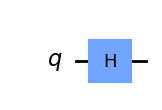

In [38]:
circuitH = QuantumCircuit(1) #(registre quantique,registre classique)
circuitH.h(0)
circuitH.draw('mpl')

<h3>Opérateur X(NOT)</h3>

Il s'agit de l'équivalent quantique du NOT classique.

$X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$

On a : $X\begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \begin{pmatrix} \beta \\ \alpha \end{pmatrix}$

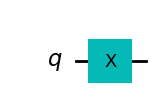

In [39]:
circuitX = QuantumCircuit(1)
circuitX.x(0)
circuitX.draw('mpl')

<h3>Opération CNOT</h3>

Elle agit sur 2 qubits et effectue le NOT sur le second qubit que lorsque le premier qubit est $|1>$.

$CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\0 & 1 & 0 & 0 \\ 0 & 0 &0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$

On a : $CNOT\begin{pmatrix} \alpha \\ \beta \\ \gamma \\ \delta \end{pmatrix} = \begin{pmatrix} \alpha \\ \beta \\ \delta \\ \gamma \end{pmatrix}$

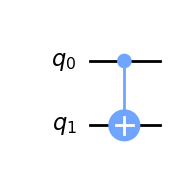

In [40]:
circuitCNOT = QuantumCircuit(2)
circuitCNOT.cx(0,1)
circuitCNOT.draw('mpl')

<h3>Opération SWAP</h3>

Elle intervertit 2 qubits.

$SWAP = \begin{pmatrix} 1 & 0 & 0 & 0 \\0 & 0 & 1 & 0 \\ 0 & 1 &0 & 0\\ 0 & 0 & 0 & 1 \end{pmatrix}$

On a : $SWAP\begin{pmatrix} \alpha \\ \beta \\ \gamma \\ \delta \end{pmatrix} = \begin{pmatrix} \alpha \\ \gamma \\ \beta \\ \delta \end{pmatrix}$


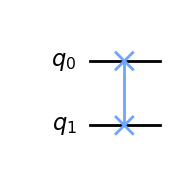

In [41]:
circuitSWAP = QuantumCircuit(2)
circuitSWAP.swap(0, 1)
circuitSWAP.draw('mpl')

<h3>Opération CSWAP</h3>

Porte 3-bits. De la même manière que SWAP mais avec 1 qubit de contrôle (échange controlé). Elle intervertit les 2e et 3e qubits si le 1er qubit est à l'état 1.

$CSWAP = \begin{pmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 &1 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\end{pmatrix}$

On a : $CSWAP\begin{pmatrix} \alpha \\ \beta \\ \gamma \\ \delta \\ \epsilon \\ \zeta \\ \eta \\ \theta \end{pmatrix} = \begin{pmatrix} \alpha \\ \beta \\ \gamma \\ \delta \\ \epsilon \\ \eta \\ \zeta \\ \theta \end{pmatrix}$

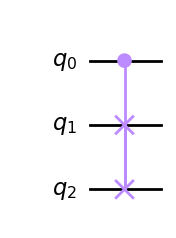

In [42]:
circuitCSWAP = QuantumCircuit(3)
circuitCSWAP.cswap(0, 1, 2)
circuitCSWAP.draw('mpl')

<h3>Opération TOF(CCNOT)</h3>

Porte 3-bits. Si les 2 premiers bits sont dans l'état |1>, elle applique NOT sur le 3ème bit. 

$TOF = \begin{pmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 &1 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\end{pmatrix}$

On a : $TOF\begin{pmatrix} \alpha \\ \beta \\ \gamma \\ \delta \\ \epsilon \\ \zeta \\ \eta \\ \theta \end{pmatrix} = \begin{pmatrix} \alpha \\ \beta \\ \gamma \\ \delta \\ \epsilon \\ \zeta \\ \theta \\ \eta \end{pmatrix}$

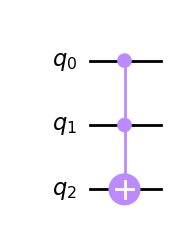

In [43]:
q = QuantumRegister(3, name='q')
c = ClassicalRegister(0)
circuitTOF = QuantumCircuit(q, c)
circuitTOF.ccx(q[0],q[1],q[2])
circuitTOF.draw('mpl')

<h3> Question 2 </h3>

Notes de la documentation concernant le retour de qiskit :

<i>A dictionary or a list of dictionaries. A dictionary has the counts for each qubit with the keys containing a string in binary format and separated according to the registers in circuit (e.g. 0100 1110). The string is little-endian (cr[0] on the right hand side).</i>

Ce qui permet de mieux comprendre les affichages suivants.

Il nous a aussi été demandé pour cette question de proposer à l'utilisateur d'initialiser les qubits, d'où les boucles if.

In [4]:
#Hadamard
#Imports nécéssaires


from qiskit import transpile, QuantumCircuit
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import *
import matplotlib.pyplot as plt

import numpy as np

def Hadamard(q, nbshots):#q correspond au qubit initialisé, nbshots au nombre de shots
    simulator = QasmSimulator()
    circuit = QuantumCircuit(1, 1)
    if q == 1:
        circuit.x(0)
    circuit.h(0) 
    circuit.measure(0,0) # On sauvegarde la mesure du premier qubit dans le premier bit du registre classique
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=nbshots)
    result = job.result()
    counts = result.get_counts(circuit)
    print(circuit)
    print("\nTotal pour",q,":",counts)
    return counts


In [45]:
q = int(input("Valeur de q : ")) #initialisation
nbshots = int(input("Nombre de shots : "))
Hadamard(q,nbshots)

Valeur de q : 0
Nombre de shots : 1000
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 

Total pour 0 : {'0': 489, '1': 511}


{'0': 489, '1': 511}

In [8]:
def X(q, nbshots):
    simulator = QasmSimulator()
    circuit = QuantumCircuit(1, 1)
    
    if q == 1:
        circuit.x(0)
        
    circuit.x(0)
    circuit.measure(0, 0)
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=nbshots)
    result = job.result()
    counts = result.get_counts(circuit)
    print("\nTotal pour",q,":",counts)
    
    return counts

In [47]:
q = int(input("Valeur de q : ")) #initialisation
nbshots = int(input("Nombre de shots : "))
X(q,nbshots)

Valeur de q : 0
Nombre de shots : 1000

Total pour 0 : {'1': 1000}


{'1': 1000}

In [7]:
def CNOT(q0, q1, nbshots):
    simulator = QasmSimulator()
    circuit = QuantumCircuit(2, 2)
    
    if q0 == 1:
        circuit.x(0)
    if q1 == 1:
        circuit.x(1)

    circuit.cx(0, 1) #ctrl : bit 0, cible : bit 1
    circuit.measure([0,1], [0,1]) #qbit 0 stocké dans bit 0 (reg classique) et idem pour 1
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=nbshots)
    result = job.result()
    counts = result.get_counts(circuit)
    
    print("\nTotal pour", q0, q1, " :",counts)
    
    return counts

In [49]:
q0 = int(input("Valeur de q0 : ")) #initialisation
q1 = int(input("Valeur de q1 : "))
nbshots = int(input("Nombre de shots : "))
CNOT(q0,q1,nbshots)

Valeur de q0 : 0
Valeur de q1 : 1
Nombre de shots : 1000

Total pour 0 1  : {'10': 1000}


{'10': 1000}

In [9]:
def SWAP(q0, q1, nbshots):
    simulator = QasmSimulator()
    circuit = QuantumCircuit(2, 2)
    
    if q0 == 1:
        circuit.x(0)
    if q1 == 1:
        circuit.x(1)

    circuit.swap(0, 1) #ctrl = bit 0, cible = bit 1
    circuit.measure([0,1], [0,1])
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=nbshots)
    result = job.result()
    counts = result.get_counts(circuit)
    print("\nTotal pour", q0, q1, counts)
    
    return counts

In [51]:
q0 = int(input("Valeur de q0 : ")) #initialisation
q1 = int(input("Valeur de q1 : "))
nbshots = int(input("Nombre de shots : "))
SWAP(q0,q1,nbshots)

Valeur de q0 : 0
Valeur de q1 : 1
Nombre de shots : 1000

Total pour 0 1 {'01': 1000}


{'01': 1000}

In [10]:
def CSWAP(q0, q1, q2, nbshots):
    simulator = QasmSimulator()
    circuit = QuantumCircuit(3, 3)
    if q0 == 1:
        circuit.x(0)
    if q1 == 1:
        circuit.x(1)
    if q2 == 1:
        circuit.x(2)

    circuit.cswap(0,1,2)
    circuit.measure([0,1,2], [0,1,2])
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=nbshots)
    result = job.result()
    counts = result.get_counts(circuit)
    
    print("\nTotal pour", q0, q1, q2,counts)
    circuit.draw()
    
    return counts

In [53]:
q0 = int(input("Valeur de q0 : ")) #initialisation
q1 = int(input("Valeur de q1 : "))
q2 = int(input("Valeur de q2 : "))
nbshots = int(input("Nombre de shots : "))
CSWAP(q0,q1,q2,nbshots)

Valeur de q0 : 1
Valeur de q1 : 0
Valeur de q2 : 1
Nombre de shots : 1000

Total pour 1 0 1 {'011': 1000}


{'011': 1000}

In [11]:
def CCNOT(q0, q1, q2, nbshots):
    simulator = QasmSimulator()
    circuit = QuantumCircuit(3, 3)  
    
    if q0 == 1:
        circuit.x(0)
    if q1 == 1:
        circuit.x(1)
    if q2 == 1:
        circuit.x(2)
    
    circuit.ccx(0,1,2)
    circuit.measure([0,1,2], [0,1,2])
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=nbshots)
    result = job.result()
    counts = result.get_counts(circuit)
    
    print("\nTotal pour", q0, q1, q2,counts)   
    
    return counts

In [56]:
q0 = int(input("Valeur de q0 : ")) #initialisation
q1 = int(input("Valeur de q1 : "))
q2 = int(input("Valeur de q2 : "))
nbshots = int(input("Nombre de shots : "))
CCNOT(q0,q1,q2,nbshots)

Valeur de q0 : 1
Valeur de q1 : 0
Valeur de q2 : 1
Nombre de shots : 1000

Total pour 1 0 1 {'101': 1000}


{'101': 1000}

<h3> Question 3 </h3>

Ainsi, nous avons pu réaliser quelques simulations. On peut également afficher différents visuels : 

     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 

Total pour 0 : {'1': 5046, '0': 4954}


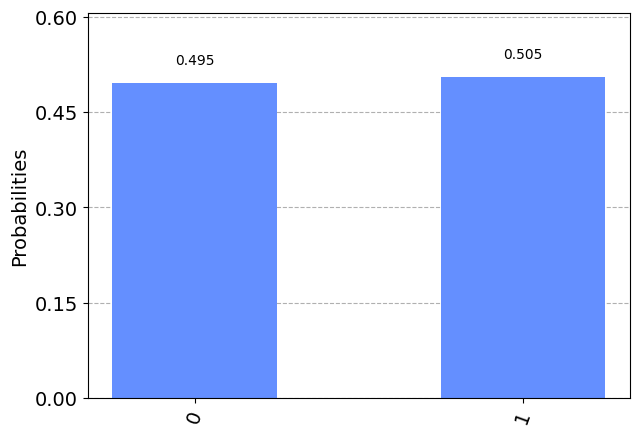

In [5]:
from qiskit.visualization import *
plot_histogram(Hadamard(0, 10000))

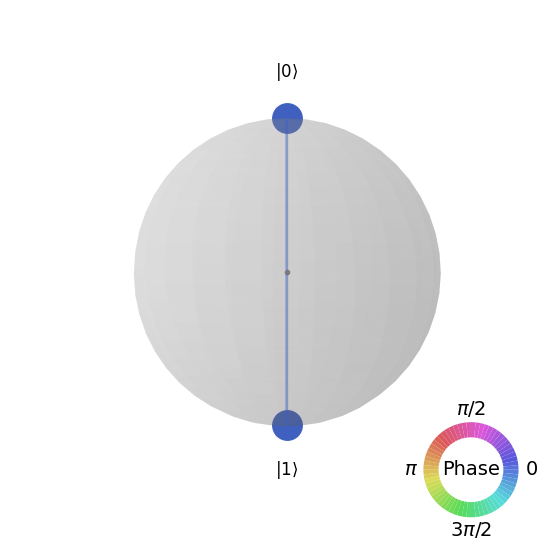

In [59]:
from qiskit.quantum_info import Statevector
state = Statevector(circuitH)
plot_state_qsphere(state) #Plot the qsphere representation of a quantum state.

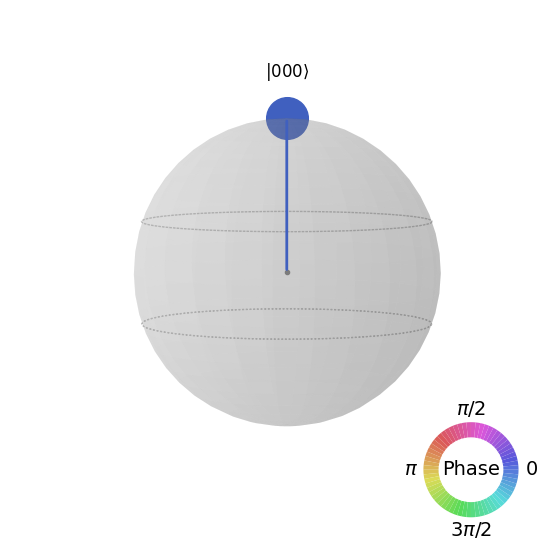

In [60]:
state = Statevector(circuitTOF)
plot_state_qsphere(state) #Plot the qsphere representation of a quantum state.

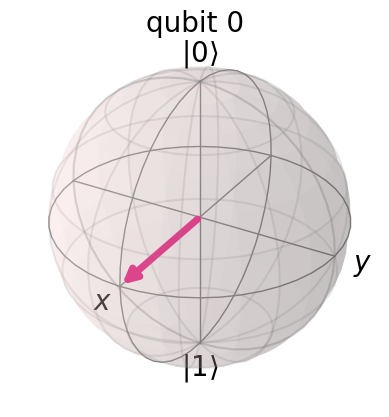

In [61]:
state = Statevector(circuitH) 
plot_bloch_multivector(state) #Plot a Bloch sphere for each qubit.

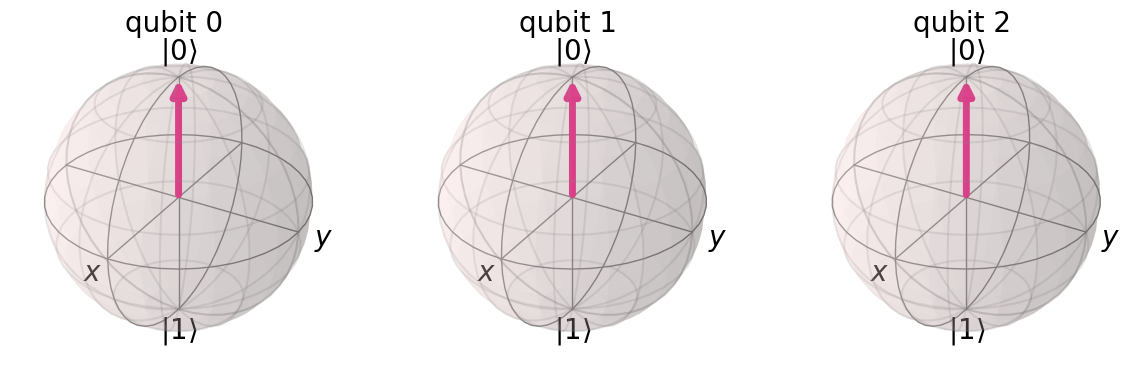

In [79]:
state = Statevector(circuitTOF) 
plot_bloch_multivector(state) #Plot a Bloch sphere for each qubit.

In [ ]:
from qiskit.quantum_info import DensityMatrix
state = DensityMatrix(circuitH) 
plot_state_city(state, color=['midnightblue', 'crimson']) #Plot the cityscape of quantum state.

<h3> Question 4 </h3>
On peut choisir, pour les circuits SWAP ET CSWAP d'une seule porte, la porte correspondante. Pour les circuits avec 3 portes, on peut réaliser un SWAP avec 3CNOT comme ceci : 

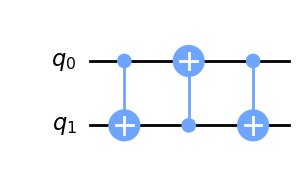

In [3]:
#SWAP w/ 3*CNOT
circuitSWAP2 = QuantumCircuit(2)
circuitSWAP2.cnot(0,1)
circuitSWAP2.cnot(1,0)
circuitSWAP2.cnot(0,1)
circuitSWAP2.draw('mpl')

On peut également réaliser un CSWAP avec 3CCNOT comme ceci : 

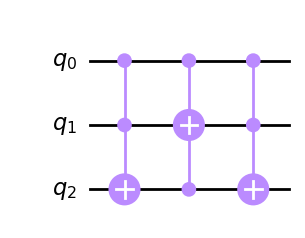

In [4]:
# CSWAP w/ 3*CCNOT
circuitCSWAP2 = QuantumCircuit(3)
circuitCSWAP2.ccx(0,1,2)
circuitCSWAP2.ccx(0,2,1)
circuitCSWAP2.ccx(0,1,2)
circuitCSWAP2.draw('mpl')

On peut vérifier les résultats comme précedemment : 

In [5]:
def SWAP2(q0, q1, nbshots):
    simulator = QasmSimulator()
    circuit = QuantumCircuit(2, 2)
    
    if q0 == 1:
        circuit.x(0)
    if q1 == 1:
        circuit.x(1)

    circuit.cx(0, 1)
    circuit.cx(1, 0)
    circuit.cx(0, 1)
    
    circuit.measure([0,1], [0,1])
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=nbshots)
    result = job.result()
    counts = result.get_counts(circuit)
    
    print("\nTotal pour",q0, q1,counts)
    print(circuit)
    return counts

In [13]:
q0 = int(input("Valeur de q0 : ")) #initialisation
q1 = int(input("Valeur de q1 : "))
nbshots = int(input("Nombre de shots : "))
print("\nSWAP avec 1 porte : ")
SWAP(q0,q1,nbshots)
print("\nSWAP avec 3 portes : ")
SWAP2(q0,q1,nbshots)

Valeur de q0 : 0
Valeur de q1 : 1
Nombre de shots : 1000

SWAP avec 1 porte : 

Total pour 0 1 {'01': 1000}

SWAP avec 3 portes : 

Total pour 0 1 {'01': 1000}
               ┌───┐     ┌─┐   
q_0: ───────■──┤ X ├──■──┤M├───
     ┌───┐┌─┴─┐└─┬─┘┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ X ├──■──┤ X ├─╫─┤M├
     └───┘└───┘     └───┘ ║ └╥┘
c: 2/═════════════════════╩══╩═
                          0  1 


{'01': 1000}

In [14]:
def CSWAP2(q0, q1, q2, nbshots):
    simulator = QasmSimulator()
    circuit = QuantumCircuit(3, 3)
    
    if q0 == 1:
        circuit.x(0)
    if q1 == 1:
        circuit.x(1)
    if q2 == 1:
        circuit.x(2)

    circuit.ccx(0, 1, 2)
    circuit.ccx(0, 2, 1)
    circuit.ccx(0, 1, 2)
    circuit.measure([0,1,2], [0,1,2])
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=nbshots)
    result = job.result()
    counts = result.get_counts(circuit)
    print("\nTotal pour", q0, q1, q2, counts)
    print(circuit)
    
    return counts

In [15]:
q0 = int(input("Valeur de q0 : ")) #initialisation
q1 = int(input("Valeur de q1 : "))
q2 = int(input("Valeur de q2 : "))
nbshots = int(input("Nombre de shots : "))
print("\nCSWAP avec 1 porte : ")
CSWAP(q0,q1,q2,nbshots)
print("\nCSWAP avec 3 portes : ")
CSWAP2(q0,q1,q2,nbshots)

Valeur de q0 : 0
Valeur de q1 : 1
Valeur de q2 : 0
Nombre de shots : 1000

CSWAP avec 1 porte : 

Total pour 0 1 0 {'010': 1000}

CSWAP avec 3 portes : 

Total pour 0 1 0 {'010': 1000}
                         ┌─┐      
q_0: ───────■────■────■──┤M├──────
     ┌───┐  │  ┌─┴─┐  │  └╥┘┌─┐   
q_1: ┤ X ├──■──┤ X ├──■───╫─┤M├───
     └───┘┌─┴─┐└─┬─┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ─────┤ X ├──■──┤ X ├─╫──╫─┤M├
          └───┘     └───┘ ║  ║ └╥┘
c: 3/═════════════════════╩══╩══╩═
                          0  1  2 


{'010': 1000}

<h2> Exercice 3 </h2>

A) Pour q0 = |0> et q1 = |0>. On applique la porte H sur q0:

$\frac{1}{\sqrt{2}}(|0>+|1>) \ \otimes \ |0> \ = \ \frac{1}{\sqrt{2}}(|00>+|10>)$

On applique CNOT avec q0 en qubit de contrôle, d'où : 

$\frac{1}{\sqrt{2}}(|00> + |11>)$

B) Pour q0 = |0> et q1 = |1>. On applique la porte H sur q0:

$\frac{1}{\sqrt{2}}(|0>+|1>) \ \otimes \ |1> \ = \ \frac{1}{\sqrt{2}}(|00>+|11>)$

On applique CNOT avec q0 en qubit de contrôle, d'où : 

$\frac{1}{\sqrt{2}}(|00> + |10>)$

C) Pour q0 = |1> et q1 = |0>. On applique la porte H sur q0:

$\frac{1}{\sqrt{2}}(|0>-|1>) \ \otimes \ |0> \ = \ \frac{1}{\sqrt{2}}(|00>-|10>)$

On applique CNOT avec q0 en qubit de contrôle, d'où : 

$\frac{1}{\sqrt{2}}(|00> - |11>)$

D) Pour q0 = |0> et q1 = |0>. On applique la porte H sur q0:

$\frac{1}{\sqrt{2}}(|0>-|1>) \ \otimes \ |1> \ = \ \frac{1}{\sqrt{2}}(|00>-|11>)$

On applique CNOT avec q0 en qubit de contrôle, d'où : 

$\frac{1}{\sqrt{2}}(|00> - |10>)$

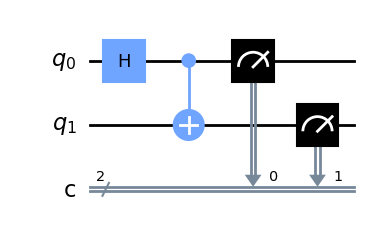

In [1]:
import numpy as np
from qiskit import *
#Création d’un circuit quantique instance de QuantumCircuit
#numéro de qubit qu'on veut intriquer
def etat_bell(circuit, numR1, numR2):
    #Ajouter une porte H pour l’entrée (qubit) 0 => superposition
    circuit.h(numR1)
    # Ajouter l’opération CNOT avec 0 comme qubit de control et le qubit 1 comme cible
    # => état de Bell
    circuit.cx(numR1, numR2)
    return circuit
circuit = QuantumCircuit(2,2)
etat_bell(circuit, 0, 1) #je veux intriquer les qubits 0 et 1 sur ce ricuit
circuit.measure([0,1],[0,1])
circuit.draw('mpl')

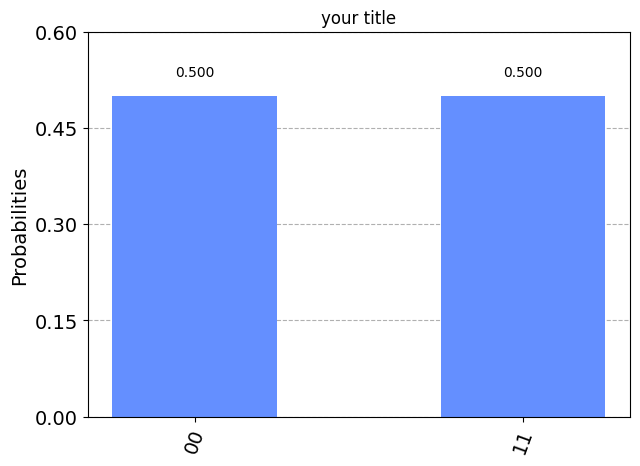

In [17]:
Aer.backends()
simulator = Aer.get_backend('aer_simulator')
compiled_circuit = transpile(circuit, simulator)
job = simulator.run(circuit, shots=100000)
result = job.result()
counts = result.get_counts(circuit)
plot_histogram(counts, title='your title')

In [ ]:
import qiskit
from qiskit.tools.monitor import job_monitor
# Get the API token in
# https://quantum-computing.ibm.com/
IBMQ.save_account("d5b3e692d7d88a01fcd8b464e2fdb77c23a978f562e23374599e82bf2ff9e1121d02ae09578f73b69958702775b1a530856e2d6542494e20efa1aa3082bd6f24")
provider = IBMQ.load_account()
#Backend class interfacing with an IBM Quantum Experience device (= ibm_quito).
backend = provider.get_backend('ibmq_belem')
optimized_circuit = qiskit.transpile(circuit, backend)
optimized_circuit.draw()
# run in real hardware
job = backend.run(optimized_circuit)
retrieved_job = backend.retrieve_job(job.job_id())
result = retrieved_job.result()
print(result.get_counts())

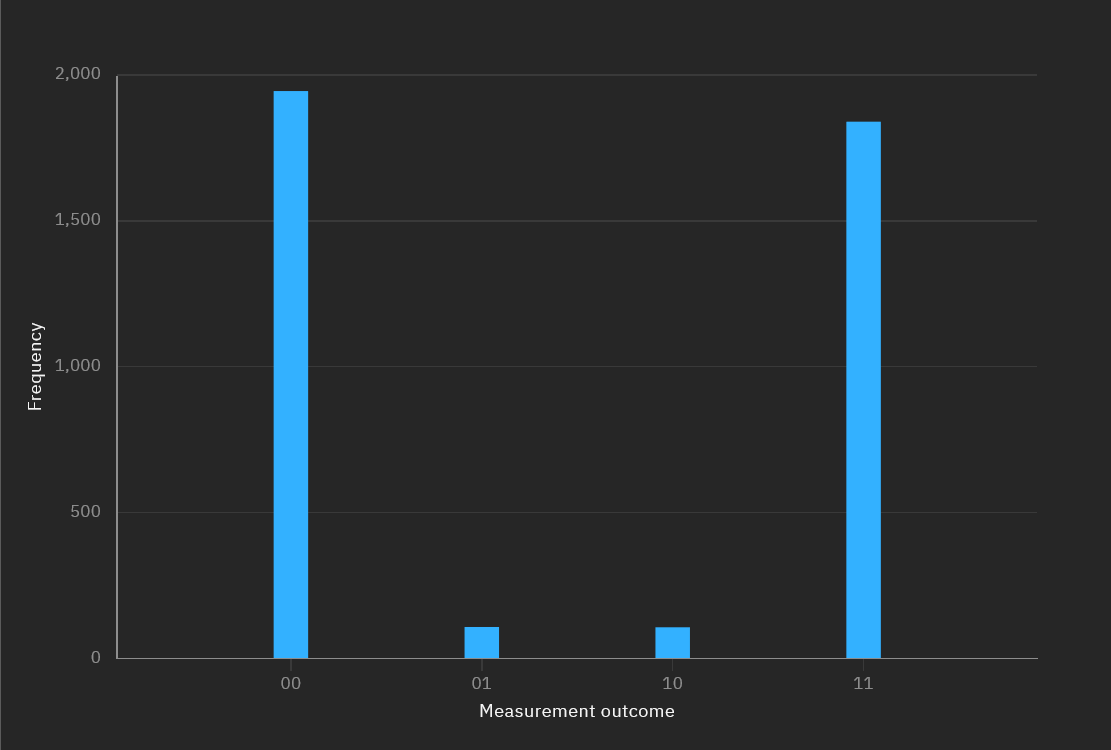

<h2> Exercice 4 </h2>

In [93]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector

In [94]:
def alice(qc, psi, a): 
    qc.cx(psi, a)
    qc.h(psi)

def mesure(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

def bob(qc, qubit, crz, crx):
    qc.x(qubit).c_if(crx, 1) # Appliquer les portes si les registres st dans l'état 1
    qc.z(qubit).c_if(crz, 1) 

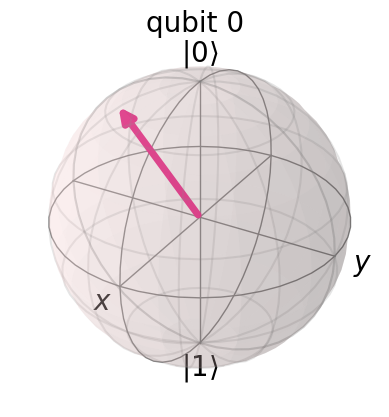

In [97]:
psi = random_statevector(2) #on génère un psi aléatoire
plot_bloch_multivector(psi)

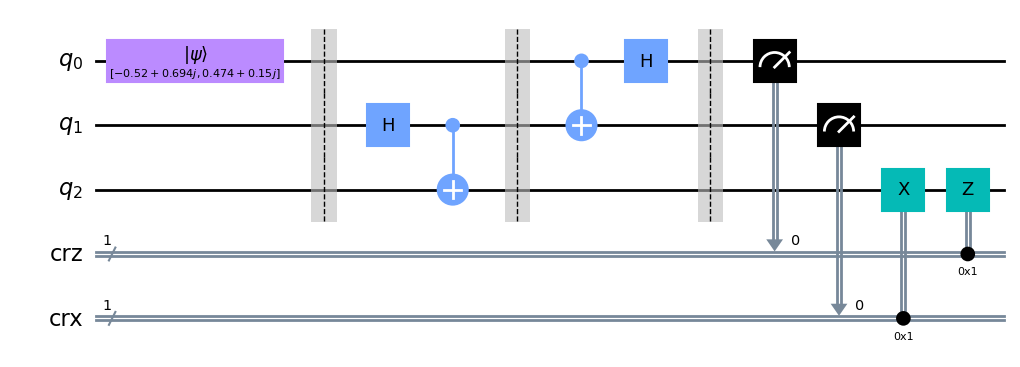

In [106]:
init_gate = Initialize(psi) 
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
tele = QuantumCircuit(qr, crz, crx)

tele.append(init_gate, [0]) #qubit d'Alice
tele.barrier()

etat_bell(tele, 1, 2) #préparation de l'état de Bell
tele.barrier()
alice(tele, 0, 1) #Envoi de q1 à Alice et q2 à Bob
mesure(tele, 0, 1) #Alice mesure les 2 qubits qu'elle possede et les stocke dans 2 bits classiques / envoi à bob
bob(tele, 2, crz, crx) #Bob a reçu l'info classique de Alice + seconde partie de l'état de Bell, il décode les 2 qubits
tele.draw('mpl')





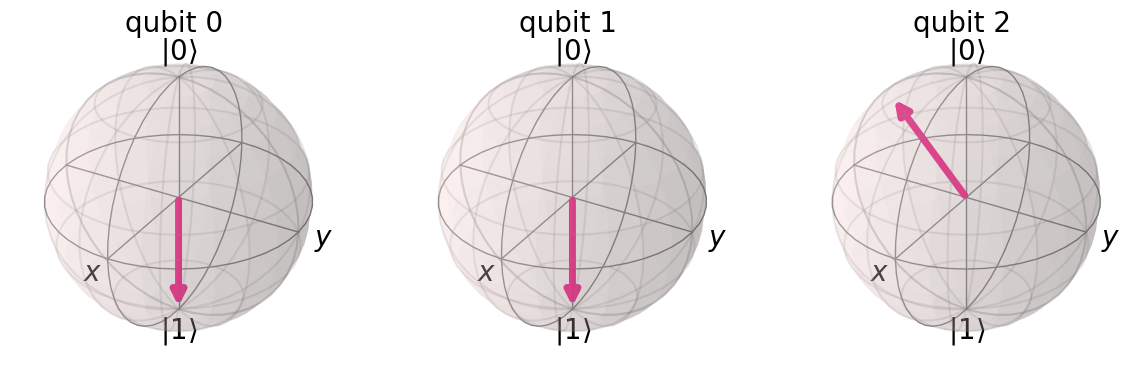

In [101]:
sim = Aer.get_backend('aer_simulator')
tele.save_statevector()
out_vector = sim.run(tele).result().get_statevector()
plot_bloch_multivector(out_vector)